In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data(path='mnist.npz')

print("K.image_data_format() = {}".format(K.image_data_format()))
x_train = x_train_raw.reshape(x_train_raw.shape[0], x_train_raw.shape[1], x_train_raw.shape[2], 1)
x_test = x_test_raw.reshape(x_test_raw.shape[0], x_test_raw.shape[1], x_test_raw.shape[2], 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

num_classes = 10
y_train = np_utils.to_categorical(y_train_raw, num_classes)
y_test = np_utils.to_categorical(y_test_raw, num_classes)

print("x_train.shape = {}, y_train.shape = {}".format(x_train.shape, y_train.shape))
print("x_test.shape = {}, y_test.shape = {}".format(x_test.shape, y_test.shape))

K.image_data_format() = channels_last
x_train.shape = (60000, 28, 28, 1), y_train.shape = (60000, 10)
x_test.shape = (10000, 28, 28, 1), y_test.shape = (10000, 10)


In [3]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [5]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 26, 26, 32]
[None, 24, 24, 64]
[None, 12, 12, 64]
[None, 12, 12, 64]
[None, None]
[None, 128]
[None, 128]
[None, 10]


In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [7]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.2368 - acc: 0.9283 - val_loss: 0.0549 - val_acc: 0.9822
Epoch 2/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.0789 - acc: 0.9769 - val_loss: 0.0361 - val_acc: 0.9872
Epoch 3/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.0605 - acc: 0.9818 - val_loss: 0.0298 - val_acc: 0.9891
Epoch 4/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.0507 - acc: 0.9842 - val_loss: 0.0301 - val_acc: 0.9900
Epoch 5/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.0416 - acc: 0.9875 - val_loss: 0.0266 - val_acc: 0.9917


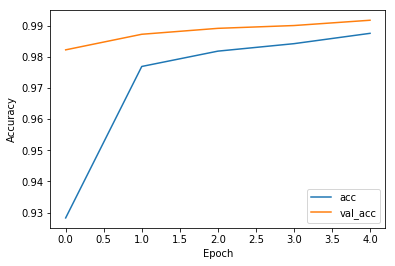

In [8]:
plt.figure()
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

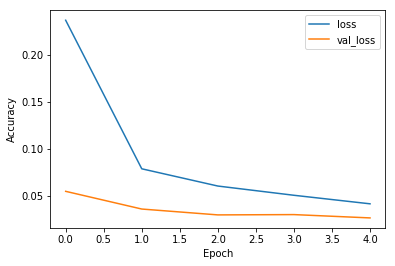

In [9]:
plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
result = model.evaluate(x_test, y_test, verbose=1)
print("test loss: {}, test accuracy: {}".format(result[0], result[1]))

predict = model.predict_classes(x_test)

correct_idx = np.nonzero(predict == y_test_raw)[0]
incorrect_idx = np.nonzero(predict != y_test_raw)[0]

10000/10000 [==============================] - 1s 72us/step
test loss: 0.026610311723153063, test accuracy: 0.9917
